# 9-2. 모델 크기 조절
## 데이터 로드 및 전처리

In [62]:
from keras.datasets import imdb
import numpy as np

def one_hot_encoding(data, dim=10000): # 아래 imdb.load_data의 num_words를 10000으로 설정할 예정이기 때문에 dim도 10000으로 맞춰줍니다.
  results = np.zeros((len(data), dim))
  for i, d in enumerate(data):
    results[i, d] = 1.
  return results

(train_data, train_labels), (test_data, test_labels) = imdb.load_data(num_words=10000)

x_train = one_hot_encoding(train_data)
x_test = one_hot_encoding(test_data)

y_train = np.asarray(train_labels).astype('float32')
y_test = np.asarray(test_labels).astype('float32')

## 모델 구성 및 컴파일

In [63]:
import tensorflow as tf
from tensorflow.keras import models, layers

model = models.Sequential()
model.add(layers.Dense(128, activation='relu', input_shape=(10000, ), name='input'))
model.add(layers.Dense(128, activation='relu', name='hidden'))
model.add(layers.Dense(1, activation='sigmoid', name='output'))

model.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['accuracy'])
model.summary()

Model: "sequential_29"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input (Dense)               (None, 128)               1280128   
                                                                 
 hidden (Dense)              (None, 128)               16512     
                                                                 
 output (Dense)              (None, 1)                 129       
                                                                 
Total params: 1296769 (4.95 MB)
Trainable params: 1296769 (4.95 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


## 모델 학습

In [64]:
history = model.fit(x_train, y_train,
                    epochs=30,
                    batch_size=512,
                    validation_data=(x_test, y_test))

Epoch 1/30
49/49 [==============================] - 2s 37ms/step - loss: 0.4599 - accuracy: 0.7729 - val_loss: 0.3005 - val_accuracy: 0.8833
Epoch 2/30
49/49 [==============================] - 1s 14ms/step - loss: 0.2625 - accuracy: 0.8965 - val_loss: 0.2939 - val_accuracy: 0.8798
Epoch 3/30
49/49 [==============================] - 1s 14ms/step - loss: 0.2102 - accuracy: 0.9166 - val_loss: 0.2862 - val_accuracy: 0.8822
Epoch 4/30
49/49 [==============================] - 1s 14ms/step - loss: 0.1729 - accuracy: 0.9339 - val_loss: 0.2883 - val_accuracy: 0.8822
Epoch 5/30
49/49 [==============================] - 1s 13ms/step - loss: 0.1342 - accuracy: 0.9502 - val_loss: 0.3646 - val_accuracy: 0.8580
Epoch 6/30
49/49 [==============================] - 1s 13ms/step - loss: 0.1022 - accuracy: 0.9628 - val_loss: 0.4505 - val_accuracy: 0.8511
Epoch 7/30
49/49 [==============================] - 1s 13ms/step - loss: 0.0794 - accuracy: 0.9733 - val_loss: 0.4275 - val_accuracy: 0.8641
Epoch 8/30
49

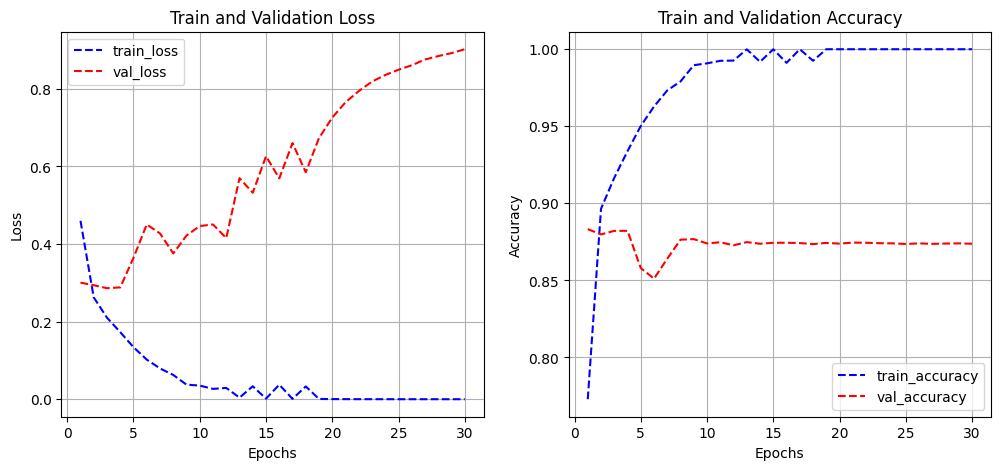

In [65]:
import matplotlib.pyplot as plt

history_dict = history.history

loss = history_dict['loss']
val_loss = history_dict['val_loss']
epochs = range(1, len(loss) + 1)

fig = plt.figure(figsize=(12, 5))

ax1 = fig.add_subplot(1, 2, 1)
ax1.plot(epochs, loss, 'b--', label='train_loss')
ax1.plot(epochs, val_loss, 'r--', label='val_loss')
ax1.set_title('Train and Validation Loss')
ax1.set_xlabel('Epochs')
ax1.set_ylabel('Loss')
ax1.grid()
ax1.legend()

accuracy = history_dict['accuracy']
val_accuracy = history_dict['val_accuracy']

ax2 = fig.add_subplot(1, 2, 2)
ax2.plot(epochs, accuracy, 'b--', label='train_accuracy')
ax2.plot(epochs, val_accuracy, 'r--', label='val_accuracy')
ax2.set_title('Train and Validation Accuracy')
ax2.set_xlabel('Epochs')
ax2.set_ylabel('Accuracy')
ax2.grid()
ax2.legend()

plt.show()

## 모델 크기 증가
- Dense Layer의 유닛 수를 128 -> 2048

In [66]:
b_model = models.Sequential()
b_model.add(layers.Dense(2048, activation='relu', input_shape=(10000, ), name='input3'))
b_model.add(layers.Dense(2048, activation='relu', name='hidden3'))
b_model.add(layers.Dense(1, activation='sigmoid', name='output3'))
b_model.compile(optimizer='rmsprop',
                loss='binary_crossentropy',
                metrics=['accuracy'])
b_model.summary()

Model: "sequential_30"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input3 (Dense)              (None, 2048)              20482048  
                                                                 
 hidden3 (Dense)             (None, 2048)              4196352   
                                                                 
 output3 (Dense)             (None, 1)                 2049      
                                                                 
Total params: 24680449 (94.15 MB)
Trainable params: 24680449 (94.15 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [67]:
b_model_history = b_model.fit(x_train, y_train,
                              epochs=30,
                              batch_size=512, 
                              validation_data=(x_test, y_test))

Epoch 1/30
49/49 [==============================] - 11s 222ms/step - loss: 0.5566 - accuracy: 0.7540 - val_loss: 0.3049 - val_accuracy: 0.8757
Epoch 2/30
49/49 [==============================] - 9s 191ms/step - loss: 0.2889 - accuracy: 0.8848 - val_loss: 0.2832 - val_accuracy: 0.8824
Epoch 3/30
49/49 [==============================] - 9s 193ms/step - loss: 0.2194 - accuracy: 0.9130 - val_loss: 0.2767 - val_accuracy: 0.8826
Epoch 4/30
49/49 [==============================] - 9s 191ms/step - loss: 0.1673 - accuracy: 0.9356 - val_loss: 0.3604 - val_accuracy: 0.8515
Epoch 5/30
49/49 [==============================] - 9s 189ms/step - loss: 0.1305 - accuracy: 0.9497 - val_loss: 0.3032 - val_accuracy: 0.8844
Epoch 6/30
49/49 [==============================] - 9s 190ms/step - loss: 0.0849 - accuracy: 0.9703 - val_loss: 0.3567 - val_accuracy: 0.8806
Epoch 7/30
49/49 [==============================] - 9s 191ms/step - loss: 0.0812 - accuracy: 0.9736 - val_loss: 0.3111 - val_accuracy: 0.8800
Epoch

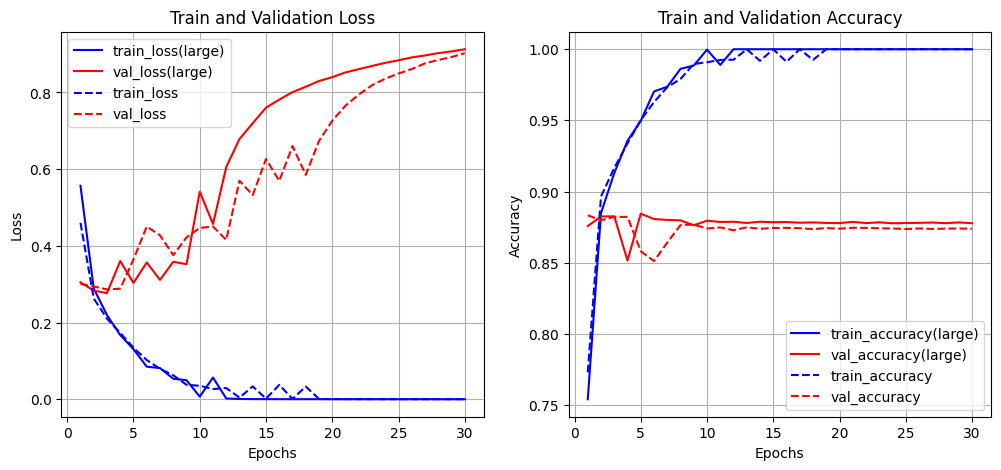

In [68]:
b_history_dict = b_model_history.history

b_loss = b_history_dict['loss']
b_val_loss = b_history_dict['val_loss']
epochs = range(1, len(b_loss) + 1)

fig = plt.figure(figsize=(12, 5))

ax1 = fig.add_subplot(1, 2, 1)
ax1.plot(epochs, b_loss, 'b-', label='train_loss(large)')
ax1.plot(epochs, b_val_loss, 'r-', label='val_loss(large)')
ax1.plot(epochs, loss, 'b--', label='train_loss')
ax1.plot(epochs, val_loss, 'r--', label='val_loss')
ax1.set_title('Train and Validation Loss')
ax1.set_xlabel('Epochs')
ax1.set_ylabel('Loss')
ax1.grid()
ax1.legend()

b_accuracy = b_history_dict['accuracy']
b_val_accuracy = b_history_dict['val_accuracy']

ax2 = fig.add_subplot(1, 2, 2)
ax2.plot(epochs, b_accuracy, 'b-', label='train_accuracy(large)')
ax2.plot(epochs, b_val_accuracy, 'r-', label='val_accuracy(large)')
ax2.plot(epochs, accuracy, 'b--', label='train_accuracy')
ax2.plot(epochs, val_accuracy, 'r--', label='val_accuracy')
ax2.set_title('Train and Validation Accuracy')
ax2.set_xlabel('Epochs')
ax2.set_ylabel('Accuracy')
ax2.grid()
ax2.legend()

plt.show()

## 모델 크기 감소

In [69]:
s_model = models.Sequential()
s_model.add(layers.Dense(16, activation='relu', input_shape=(10000, ), name='input2'))
s_model.add(layers.Dense(16, activation='relu', name='hidden2'))
s_model.add(layers.Dense(1, activation='sigmoid', name='output2'))
s_model.compile(optimizer='rmsprop',
                loss='binary_crossentropy',
                metrics=['accuracy'])
s_model.summary()

Model: "sequential_31"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input2 (Dense)              (None, 16)                160016    
                                                                 
 hidden2 (Dense)             (None, 16)                272       
                                                                 
 output2 (Dense)             (None, 1)                 17        
                                                                 
Total params: 160305 (626.19 KB)
Trainable params: 160305 (626.19 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [70]:
s_model_history = s_model.fit(x_train, y_train,
                              epochs=30,
                              batch_size=512, 
                              validation_data=(x_test, y_test))

Epoch 1/30
49/49 [==============================] - 1s 23ms/step - loss: 0.4969 - accuracy: 0.7907 - val_loss: 0.3666 - val_accuracy: 0.8766
Epoch 2/30
49/49 [==============================] - 0s 8ms/step - loss: 0.2899 - accuracy: 0.9020 - val_loss: 0.2915 - val_accuracy: 0.8890
Epoch 3/30
49/49 [==============================] - 0s 8ms/step - loss: 0.2227 - accuracy: 0.9218 - val_loss: 0.2855 - val_accuracy: 0.8854
Epoch 4/30
49/49 [==============================] - 0s 8ms/step - loss: 0.1893 - accuracy: 0.9326 - val_loss: 0.2820 - val_accuracy: 0.8876
Epoch 5/30
49/49 [==============================] - 0s 8ms/step - loss: 0.1645 - accuracy: 0.9420 - val_loss: 0.3064 - val_accuracy: 0.8784
Epoch 6/30
49/49 [==============================] - 0s 8ms/step - loss: 0.1461 - accuracy: 0.9493 - val_loss: 0.3082 - val_accuracy: 0.8806
Epoch 7/30
49/49 [==============================] - 0s 8ms/step - loss: 0.1317 - accuracy: 0.9550 - val_loss: 0.3237 - val_accuracy: 0.8781
Epoch 8/30
49/49 [=

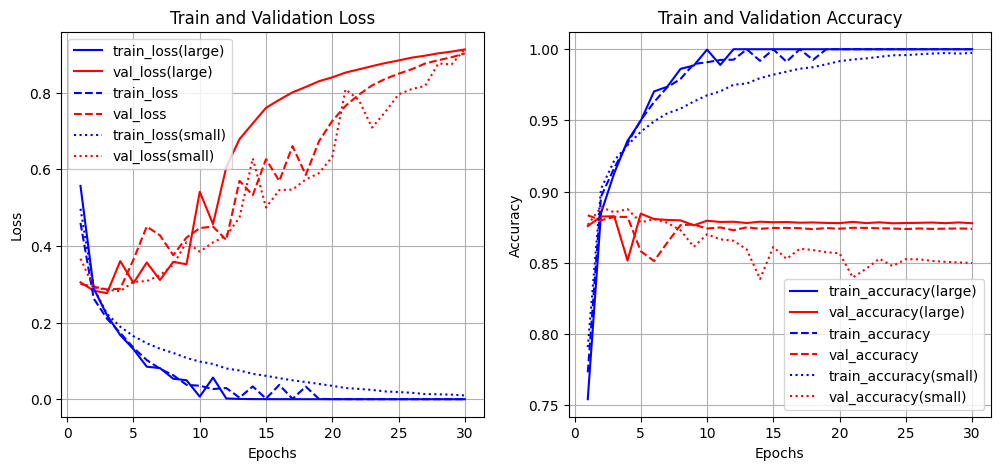

In [71]:
s_history_dict = s_model_history.history

s_loss = s_history_dict['loss']
s_val_loss = s_history_dict['val_loss']
epochs = range(1, len(s_loss) + 1)

fig = plt.figure(figsize=(12, 5))

ax1 = fig.add_subplot(1, 2, 1)
ax1.plot(epochs, b_loss, 'b-', label='train_loss(large)')
ax1.plot(epochs, b_val_loss, 'r-', label='val_loss(large)')
ax1.plot(epochs, loss, 'b--', label='train_loss')
ax1.plot(epochs, val_loss, 'r--', label='val_loss')
ax1.plot(epochs, s_loss, 'b:', label='train_loss(small)')
ax1.plot(epochs, s_val_loss, 'r:', label='val_loss(small)')
ax1.set_title('Train and Validation Loss')
ax1.set_xlabel('Epochs')
ax1.set_ylabel('Loss')
ax1.grid()
ax1.legend()

s_accuracy = s_history_dict['accuracy']
s_val_accuracy = s_history_dict['val_accuracy']

ax2 = fig.add_subplot(1, 2, 2)
ax2.plot(epochs, b_accuracy, 'b-', label='train_accuracy(large)')
ax2.plot(epochs, b_val_accuracy, 'r-', label='val_accuracy(large)')
ax2.plot(epochs, accuracy, 'b--', label='train_accuracy')
ax2.plot(epochs, val_accuracy, 'r--', label='val_accuracy')
ax2.plot(epochs, s_accuracy, 'b:', label='train_accuracy(small)')
ax2.plot(epochs, s_val_accuracy, 'r:', label='val_accuracy(small)')
ax2.set_title('Train and Validation Accuracy')
ax2.set_xlabel('Epochs')
ax2.set_ylabel('Accuracy')
ax2.grid()
ax2.legend()

plt.show()

# 9-3. 규제 (Refularization)

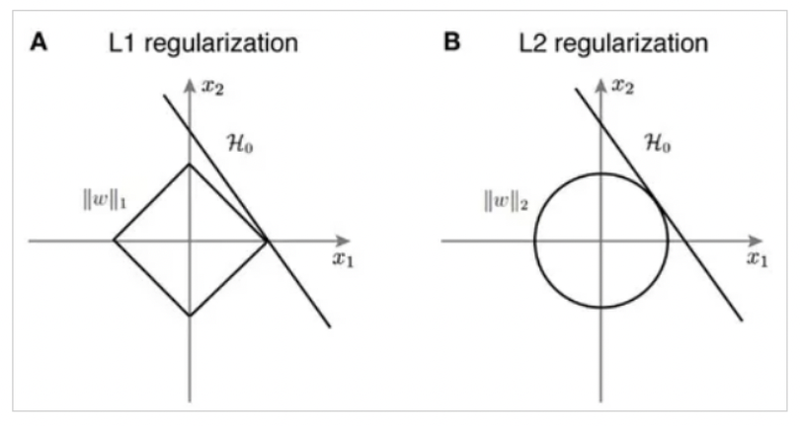


## L1 규제

In [72]:
l1_model =  models.Sequential()
l1_model.add(layers.Dense(16, 
                          kernel_regularizer='l1',
                          activation='relu', 
                          input_shape=(10000, )))
l1_model.add(layers.Dense(16, 
                          kernel_regularizer='l1',
                          activation='relu'))
l1_model.add(layers.Dense(1, activation='sigmoid'))
l1_model.compile(optimizer='rmsprop',
                 loss='binary_crossentropy',
                 metrics=['accuracy'])
l1_model.summary()

Model: "sequential_32"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_18 (Dense)            (None, 16)                160016    
                                                                 
 dense_19 (Dense)            (None, 16)                272       
                                                                 
 dense_20 (Dense)            (None, 1)                 17        
                                                                 
Total params: 160305 (626.19 KB)
Trainable params: 160305 (626.19 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [73]:
l1_model_hist = l1_model.fit(x_train, y_train,
                             epochs=30,
                             batch_size=512,
                             validation_data=(x_test, y_test))

Epoch 1/30
49/49 [==============================] - 2s 24ms/step - loss: 3.7490 - accuracy: 0.5618 - val_loss: 1.9410 - val_accuracy: 0.6230
Epoch 2/30
49/49 [==============================] - 0s 8ms/step - loss: 1.8731 - accuracy: 0.6785 - val_loss: 1.8048 - val_accuracy: 0.7180
Epoch 3/30
49/49 [==============================] - 0s 8ms/step - loss: 1.7618 - accuracy: 0.7192 - val_loss: 1.7218 - val_accuracy: 0.7222
Epoch 4/30
49/49 [==============================] - 0s 8ms/step - loss: 1.6676 - accuracy: 0.7456 - val_loss: 1.6125 - val_accuracy: 0.7632
Epoch 5/30
49/49 [==============================] - 0s 8ms/step - loss: 1.5834 - accuracy: 0.7612 - val_loss: 1.5533 - val_accuracy: 0.7739
Epoch 6/30
49/49 [==============================] - 0s 8ms/step - loss: 1.5119 - accuracy: 0.7750 - val_loss: 1.4729 - val_accuracy: 0.7823
Epoch 7/30
49/49 [==============================] - 0s 8ms/step - loss: 1.4543 - accuracy: 0.7856 - val_loss: 1.4390 - val_accuracy: 0.7893
Epoch 8/30
49/49 [=

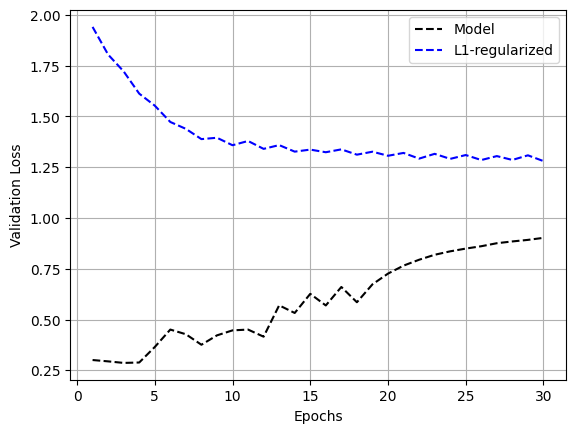

In [74]:
l1_val_loss = l1_model_hist.history['val_loss']

epochs = range(1, 31)
plt.plot(epochs, val_loss, 'k--', label='Model')
plt.plot(epochs, l1_val_loss, 'b--', label='L1-regularized')
plt.xlabel('Epochs')
plt.ylabel('Validation Loss')
plt.legend()
plt.grid()
plt.show()

## L2 규제

In [75]:
l2_model =  models.Sequential()
l2_model.add(layers.Dense(16, 
                          kernel_regularizer='l2',
                          activation='relu', 
                          input_shape=(10000, )))
l2_model.add(layers.Dense(16, 
                          kernel_regularizer='l2',
                          activation='relu'))
l2_model.add(layers.Dense(1, activation='sigmoid'))
l2_model.compile(optimizer='rmsprop',
                 loss='binary_crossentropy',
                 metrics=['accuracy'])
l2_model.summary()

Model: "sequential_33"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_21 (Dense)            (None, 16)                160016    
                                                                 
 dense_22 (Dense)            (None, 16)                272       
                                                                 
 dense_23 (Dense)            (None, 1)                 17        
                                                                 
Total params: 160305 (626.19 KB)
Trainable params: 160305 (626.19 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [76]:
l2_model_hist = l2_model.fit(x_train, y_train,
                             epochs=30,
                             batch_size=512,
                             validation_data=(x_test, y_test))

Epoch 1/30
49/49 [==============================] - 2s 23ms/step - loss: 0.7817 - accuracy: 0.7835 - val_loss: 0.6137 - val_accuracy: 0.8654
Epoch 2/30
49/49 [==============================] - 0s 7ms/step - loss: 0.5601 - accuracy: 0.8737 - val_loss: 0.5340 - val_accuracy: 0.8714
Epoch 3/30
49/49 [==============================] - 0s 7ms/step - loss: 0.4955 - accuracy: 0.8834 - val_loss: 0.4925 - val_accuracy: 0.8747
Epoch 4/30
49/49 [==============================] - 0s 7ms/step - loss: 0.4639 - accuracy: 0.8858 - val_loss: 0.4686 - val_accuracy: 0.8765
Epoch 5/30
49/49 [==============================] - 0s 7ms/step - loss: 0.4400 - accuracy: 0.8897 - val_loss: 0.4512 - val_accuracy: 0.8791
Epoch 6/30
49/49 [==============================] - 0s 8ms/step - loss: 0.4228 - accuracy: 0.8923 - val_loss: 0.4551 - val_accuracy: 0.8693
Epoch 7/30
49/49 [==============================] - 0s 8ms/step - loss: 0.4114 - accuracy: 0.8958 - val_loss: 0.4416 - val_accuracy: 0.8736
Epoch 8/30
49/49 [=

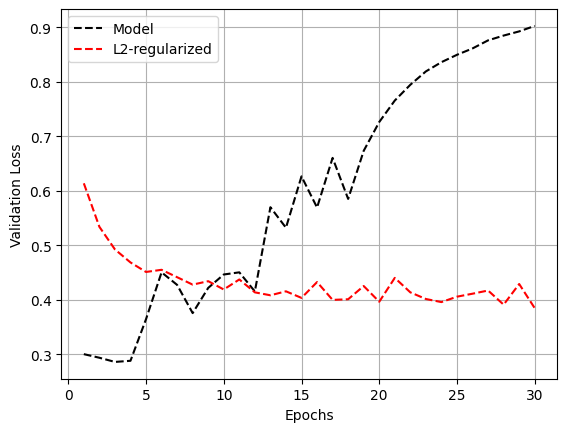

In [77]:
l2_val_loss = l2_model_hist.history['val_loss']

epochs = range(1, 31)
plt.plot(epochs, val_loss, 'k--', label='Model')
plt.plot(epochs, l2_val_loss, 'r--', label='L2-regularized')
plt.xlabel('Epochs')
plt.ylabel('Validation Loss')
plt.legend()
plt.grid()
plt.show()

## L1, L2 규제

In [78]:
l1_l2_model =  models.Sequential()
l1_l2_model.add(layers.Dense(16, 
                             kernel_regularizer='l1_l2',
                             activation='relu', input_shape=(10000, )))
l1_l2_model.add(layers.Dense(16, 
                             kernel_regularizer='l1_l2',
                             activation='relu'))
l1_l2_model.add(layers.Dense(1, activation='sigmoid'))
l1_l2_model.compile(optimizer='rmsprop',
                    loss='binary_crossentropy',
                    metrics=['accuracy'])
l1_l2_model.summary()

Model: "sequential_34"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_24 (Dense)            (None, 16)                160016    
                                                                 
 dense_25 (Dense)            (None, 16)                272       
                                                                 
 dense_26 (Dense)            (None, 1)                 17        
                                                                 
Total params: 160305 (626.19 KB)
Trainable params: 160305 (626.19 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [79]:
l1_l2_model_hist = l1_l2_model.fit(x_train, y_train,
                                  epochs=30,
                                  batch_size=512,
                                  validation_data=(x_test, y_test))

Epoch 1/30
49/49 [==============================] - 2s 26ms/step - loss: 3.8958 - accuracy: 0.5610 - val_loss: 2.0460 - val_accuracy: 0.6609
Epoch 2/30
49/49 [==============================] - 0s 8ms/step - loss: 1.9585 - accuracy: 0.6781 - val_loss: 1.8798 - val_accuracy: 0.6798
Epoch 3/30
49/49 [==============================] - 0s 9ms/step - loss: 1.8329 - accuracy: 0.7078 - val_loss: 1.7910 - val_accuracy: 0.6479
Epoch 4/30
49/49 [==============================] - 0s 9ms/step - loss: 1.7275 - accuracy: 0.7209 - val_loss: 1.6706 - val_accuracy: 0.7291
Epoch 5/30
49/49 [==============================] - 0s 8ms/step - loss: 1.6413 - accuracy: 0.7351 - val_loss: 1.6114 - val_accuracy: 0.7491
Epoch 6/30
49/49 [==============================] - 0s 8ms/step - loss: 1.5718 - accuracy: 0.7502 - val_loss: 1.5333 - val_accuracy: 0.7563
Epoch 7/30
49/49 [==============================] - 0s 8ms/step - loss: 1.5155 - accuracy: 0.7656 - val_loss: 1.4993 - val_accuracy: 0.7700
Epoch 8/30
49/49 [=

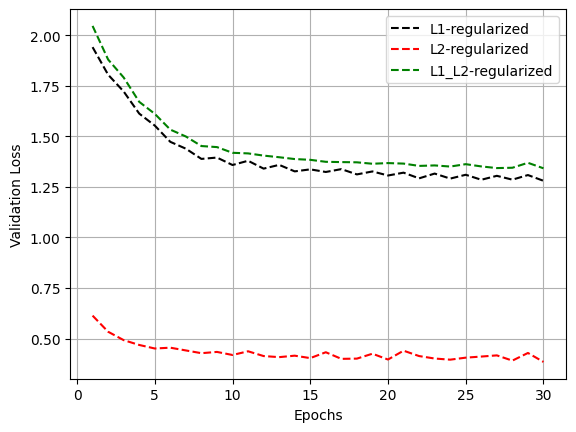

In [80]:
l1_l2_val_loss = l1_l2_model_hist.history['val_loss']

epochs = range(1, 31)
plt.plot(epochs, l1_val_loss, 'k--', label='L1-regularized')
plt.plot(epochs, l2_val_loss, 'r--', label='L2-regularized')
plt.plot(epochs, l1_l2_val_loss, 'g--', label='L1_L2-regularized')
plt.xlabel('Epochs')
plt.ylabel('Validation Loss')
plt.legend()
plt.grid()
plt.show()

# 9-4. Dropout

- 모델이 학습할 때 사용하는 노드의 수를 전체 노드 중에서 일부만을 사용하는 방법
- 신경망에 드롭아웃을 적용하면 학습이 진행되는 동안 무작위로 layer의 일부 node를 제외하는 형태로 동작

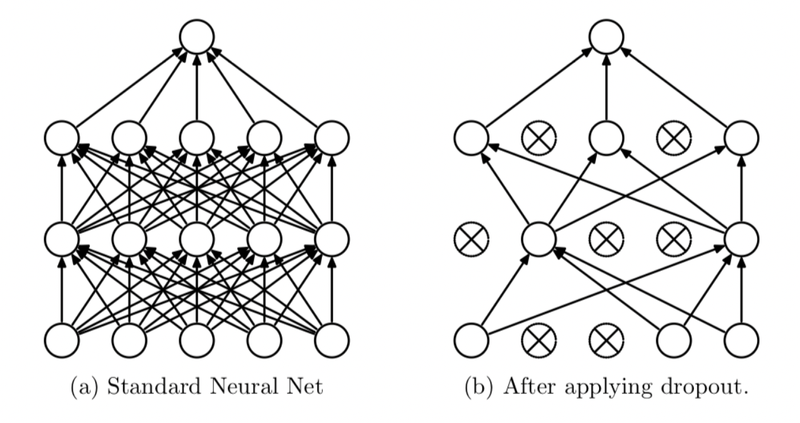

## Dropout 0.2

In [81]:
model = models.Sequential()
model.add(layers.Dense(16, activation='relu', input_shape=(10000, )))
model.add(layers.Dropout(0.2))
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dropout(0.2))
model.add(layers.Dense(1, activation='sigmoid'))

model.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['accuracy'])
model.summary()

Model: "sequential_35"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_27 (Dense)            (None, 16)                160016    
                                                                 
 dropout_6 (Dropout)         (None, 16)                0         
                                                                 
 dense_28 (Dense)            (None, 16)                272       
                                                                 
 dropout_7 (Dropout)         (None, 16)                0         
                                                                 
 dense_29 (Dense)            (None, 1)                 17        
                                                                 
Total params: 160305 (626.19 KB)
Trainable params: 160305 (626.19 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [82]:
drop_20_history = model.fit(x_train, y_train,
                            epochs=30,
                            batch_size=512,
                            validation_data=(x_test, y_test))

Epoch 1/30
49/49 [==============================] - 2s 25ms/step - loss: 0.5358 - accuracy: 0.7464 - val_loss: 0.3863 - val_accuracy: 0.8758
Epoch 2/30
49/49 [==============================] - 0s 8ms/step - loss: 0.3509 - accuracy: 0.8752 - val_loss: 0.3062 - val_accuracy: 0.8872
Epoch 3/30
49/49 [==============================] - 0s 9ms/step - loss: 0.2734 - accuracy: 0.9042 - val_loss: 0.2841 - val_accuracy: 0.8882
Epoch 4/30
49/49 [==============================] - 0s 8ms/step - loss: 0.2242 - accuracy: 0.9237 - val_loss: 0.2963 - val_accuracy: 0.8860
Epoch 5/30
49/49 [==============================] - 0s 8ms/step - loss: 0.1905 - accuracy: 0.9350 - val_loss: 0.2969 - val_accuracy: 0.8865
Epoch 6/30
49/49 [==============================] - 0s 8ms/step - loss: 0.1662 - accuracy: 0.9445 - val_loss: 0.3016 - val_accuracy: 0.8842
Epoch 7/30
49/49 [==============================] - 0s 8ms/step - loss: 0.1391 - accuracy: 0.9547 - val_loss: 0.3271 - val_accuracy: 0.8821
Epoch 8/30
49/49 [=

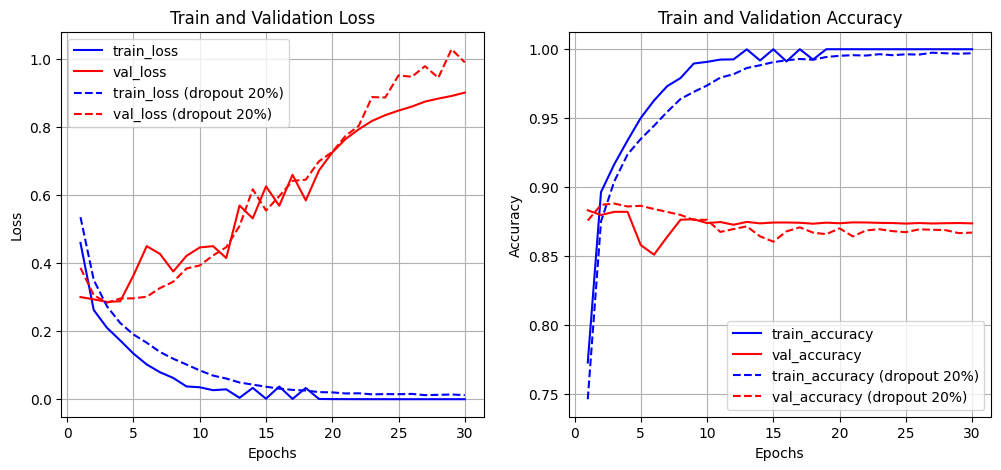

In [83]:
drop_20_dict = drop_20_history.history

drop_20_loss = drop_20_dict['loss']
drop_20_val_loss = drop_20_dict['val_loss']
epochs = range(1, len(loss) + 1)

fig = plt.figure(figsize=(12, 5))

ax1 = fig.add_subplot(1, 2, 1)
ax1.plot(epochs, loss, 'b-', label='train_loss')
ax1.plot(epochs, val_loss, 'r-', label='val_loss')
ax1.plot(epochs, drop_20_loss, 'b--', label='train_loss (dropout 20%)')
ax1.plot(epochs, drop_20_val_loss, 'r--', label='val_loss (dropout 20%)')
ax1.set_title('Train and Validation Loss')
ax1.set_xlabel('Epochs')
ax1.set_ylabel('Loss')
ax1.grid()
ax1.legend()

drop_20_accuracy = drop_20_dict['accuracy']
drop_20_val_accuracy = drop_20_dict['val_accuracy']

ax2 = fig.add_subplot(1, 2, 2)
ax2.plot(epochs, accuracy, 'b-', label='train_accuracy')
ax2.plot(epochs, val_accuracy, 'r-', label='val_accuracy')
ax2.plot(epochs, drop_20_accuracy, 'b--', label='train_accuracy (dropout 20%)')
ax2.plot(epochs, drop_20_val_accuracy, 'r--', label='val_accuracy (dropout 20%)')
ax2.set_title('Train and Validation Accuracy')
ax2.set_xlabel('Epochs')
ax2.set_ylabel('Accuracy')
ax2.grid()
ax2.legend()

plt.show()

## Dropout 0.5

In [84]:
model = models.Sequential()
model.add(layers.Dense(16, activation='relu', input_shape=(10000, )))
model.add(layers.Dropout(0.5))
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dropout(0.5))
model.add(layers.Dense(1, activation='sigmoid'))

model.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['accuracy'])
model.summary()

Model: "sequential_36"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_30 (Dense)            (None, 16)                160016    
                                                                 
 dropout_8 (Dropout)         (None, 16)                0         
                                                                 
 dense_31 (Dense)            (None, 16)                272       
                                                                 
 dropout_9 (Dropout)         (None, 16)                0         
                                                                 
 dense_32 (Dense)            (None, 1)                 17        
                                                                 
Total params: 160305 (626.19 KB)
Trainable params: 160305 (626.19 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [85]:
drop_50_history = model.fit(x_train, y_train,
                            epochs=30,
                            batch_size=512,
                            validation_data=(x_test, y_test))

Epoch 1/30
49/49 [==============================] - 2s 24ms/step - loss: 0.5910 - accuracy: 0.6874 - val_loss: 0.4348 - val_accuracy: 0.8657
Epoch 2/30
49/49 [==============================] - 0s 8ms/step - loss: 0.4356 - accuracy: 0.8172 - val_loss: 0.3392 - val_accuracy: 0.8770
Epoch 3/30
49/49 [==============================] - 0s 9ms/step - loss: 0.3592 - accuracy: 0.8645 - val_loss: 0.2940 - val_accuracy: 0.8846
Epoch 4/30
49/49 [==============================] - 0s 8ms/step - loss: 0.3023 - accuracy: 0.8918 - val_loss: 0.2777 - val_accuracy: 0.8880
Epoch 5/30
49/49 [==============================] - 0s 8ms/step - loss: 0.2631 - accuracy: 0.9098 - val_loss: 0.2799 - val_accuracy: 0.8853
Epoch 6/30
49/49 [==============================] - 0s 8ms/step - loss: 0.2355 - accuracy: 0.9191 - val_loss: 0.2827 - val_accuracy: 0.8866
Epoch 7/30
49/49 [==============================] - 0s 8ms/step - loss: 0.2115 - accuracy: 0.9290 - val_loss: 0.3052 - val_accuracy: 0.8862
Epoch 8/30
49/49 [=

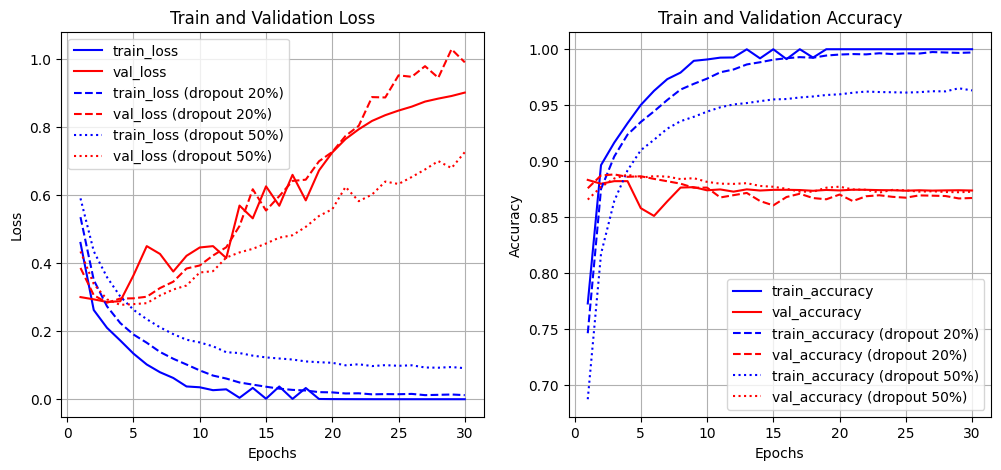

In [86]:
drop_50_dict = drop_50_history.history

drop_50_loss = drop_50_dict['loss']
drop_50_val_loss = drop_50_dict['val_loss']
epochs = range(1, len(loss) + 1)

fig = plt.figure(figsize=(12, 5))

ax1 = fig.add_subplot(1, 2, 1)
ax1.plot(epochs, loss, 'b-', label='train_loss')
ax1.plot(epochs, val_loss, 'r-', label='val_loss')
ax1.plot(epochs, drop_20_loss, 'b--', label='train_loss (dropout 20%)')
ax1.plot(epochs, drop_20_val_loss, 'r--', label='val_loss (dropout 20%)')
ax1.plot(epochs, drop_50_loss, 'b:', label='train_loss (dropout 50%)')
ax1.plot(epochs, drop_50_val_loss, 'r:', label='val_loss (dropout 50%)')
ax1.set_title('Train and Validation Loss')
ax1.set_xlabel('Epochs')
ax1.set_ylabel('Loss')
ax1.grid()
ax1.legend()

drop_50_accuracy = drop_50_dict['accuracy']
drop_50_val_accuracy = drop_50_dict['val_accuracy']

ax2 = fig.add_subplot(1, 2, 2)
ax2.plot(epochs, accuracy, 'b-', label='train_accuracy')
ax2.plot(epochs, val_accuracy, 'r-', label='val_accuracy')
ax2.plot(epochs, drop_20_accuracy, 'b--', label='train_accuracy (dropout 20%)')
ax2.plot(epochs, drop_20_val_accuracy, 'r--', label='val_accuracy (dropout 20%)')
ax2.plot(epochs, drop_50_accuracy, 'b:', label='train_accuracy (dropout 50%)')
ax2.plot(epochs, drop_50_val_accuracy, 'r:', label='val_accuracy (dropout 50%)')
ax2.set_title('Train and Validation Accuracy')
ax2.set_xlabel('Epochs')
ax2.set_ylabel('Accuracy')
ax2.grid()
ax2.legend()

plt.show()